In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def histo(dataset, columns, units=None, nbins=10, nsubplots=4):
      
    fig, ax = plt.subplots(1, nsubplots, sharey=True, tight_layout=True)
    
    for i in range(nsubplots):
        title = columns[i] + " " +  f"({units[i]})" if units is not None else columns[i]
        ax[i].title.set_text(title)
        N, bins, patches = ax[i].hist(dataset[columns[i]], bins=nbins)
        fs = N/N.max()
        color_norm = colors.Normalize(fs.min(), fs.max())
        for f, p in zip(fs, patches):
            color = plt.cm.viridis(color_norm(f))
            p.set_facecolor(color)
            
    fig.suptitle("HISTOGRAMAS")  
    plt.show()
    
def boxplot(dataset, columns, units=None, titulos=None):
    fig, ax = plt.subplots(1, len(columns), sharey=False, tight_layout=True)
    
    for i in range(len(columns)):
        bplot = ax[i].boxplot(dataset[columns[i]], patch_artist=True)
        for p in bplot["boxes"]:
            p.set_facecolor("peachpuff")
        title = titulos[i] if titulos is not None else columns[i]
        ax[i].set_title(title)
        ax[i].yaxis.grid(True)
        if units is not None:
            ax[i].set_ylabel(units[i])
        
    fig.suptitle("BOXPLOTS")  
    plt.show()
    
def scatter(dataset, columns):
    import math
    fig, ax = plt.subplots(len(columns), len(columns)-1, sharey=False, figsize=(25,25))
    p = 0
    for i in range(len(columns)):
        for j in range(len(columns)):
            if i == j:
                continue
            else:
                base = columns[i]
                comp = columns[j]
                ax[math.floor(p/3)][p%3].scatter(df[base], df[comp])
                ax[math.floor(p/3)][p%3].set_xlabel(base, fontsize=20)
                ax[math.floor(p/3)][p%3].set_ylabel(comp, fontsize=20)
                p += 1
         
    plt.show()
    
def correlation_matrix(df):
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm').set_precision(2)
    corr.plot()
    plt.show()

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


age: Idade do paciente.

sex: Sexo (1 = masculino; 0 = feminino).

cp: Tipo de dor no peito (4 valores: 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomática).

trestbps: Pressão arterial em repouso (mm Hg).

chol: Colesterol sérico em mg/dl.

fbs: Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso).

restecg: Resultados do eletrocardiograma em repouso (0 = normal; 1 = com anormalidade na onda ST-T; 2 = hipertrofia ventricular esquerda).

thalach: Frequência cardíaca máxima atingida.

exang: Angina induzida por exercício (1 = sim; 0 = não).

oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso.

slope: Inclinação do segmento ST no pico do exercício (1 = subida; 2 = plana; 3 = descendente).

ca: Número de vasos principais (0-3) coloridos por fluoroscopia.

thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível.

target: Diagnóstico de doença cardíaca (1 = presença de doença; 0 = ausência de doença).

# 2. Análise Descritiva

# VARIAVEL "AGE" - idade
#### ANALISE DESCRITIVA:

In [10]:
df["age"].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

# VARIAVEL "CHOL" - Colesterol sérico em mg/dl
#### ANALISE DESCRITIVA:

In [11]:
df["chol"].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

# VARIAVEL "TRESTBPS" - Pressão arterial em repouso (mm Hg)
#### ANALISE DESCRITIVA:

In [12]:
df["trestbps"].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

# VARIAVEL "THALACH" - Frequência cardíaca máxima atingida
#### ANALISE DESCRITIVA:

In [14]:
df["thalach"].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

# 3.VISUALIZAÇÂO DE DADOS

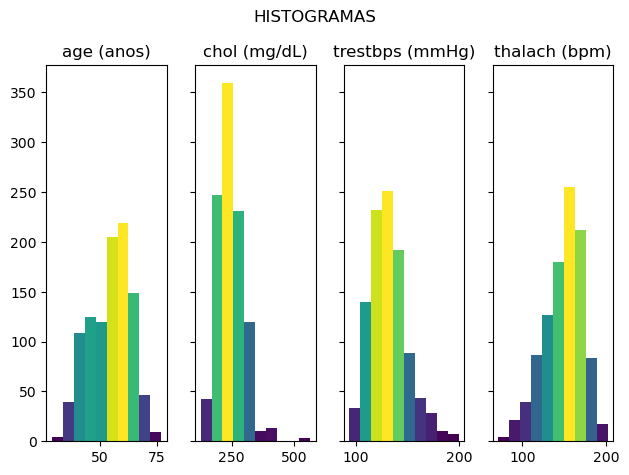

In [327]:
histo(df,["age","chol","trestbps","thalach"], ["anos", "mg/dL", "mmHg", "bpm"], 10, 4)

Os **Histogramas** ilustram um distribuição relativamente normal da data, com certo skew moderado positivo(trestbps, chol) e negativo(age, thalach)

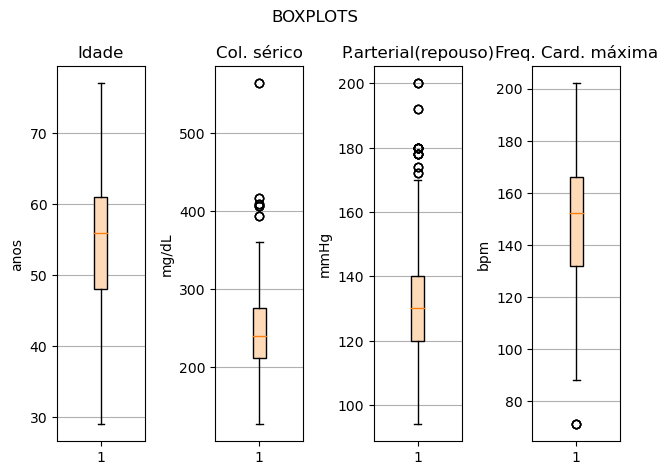

In [354]:
boxplot(df,["age","chol","trestbps","thalach"], ["anos", "mg/dL", "mmHg", "bpm"], ["Idade", "Col. sérico", "P.arterial(repouso)", "Freq. Card. máxima"])

**Boxplosts** ilustram a existencias de *outliers* nas séries referentes a concentração de colesterol sérico(CHOL), pressão arterial em repouso(TRESTBPS) e frequência cardiaca máxima(THALACH)

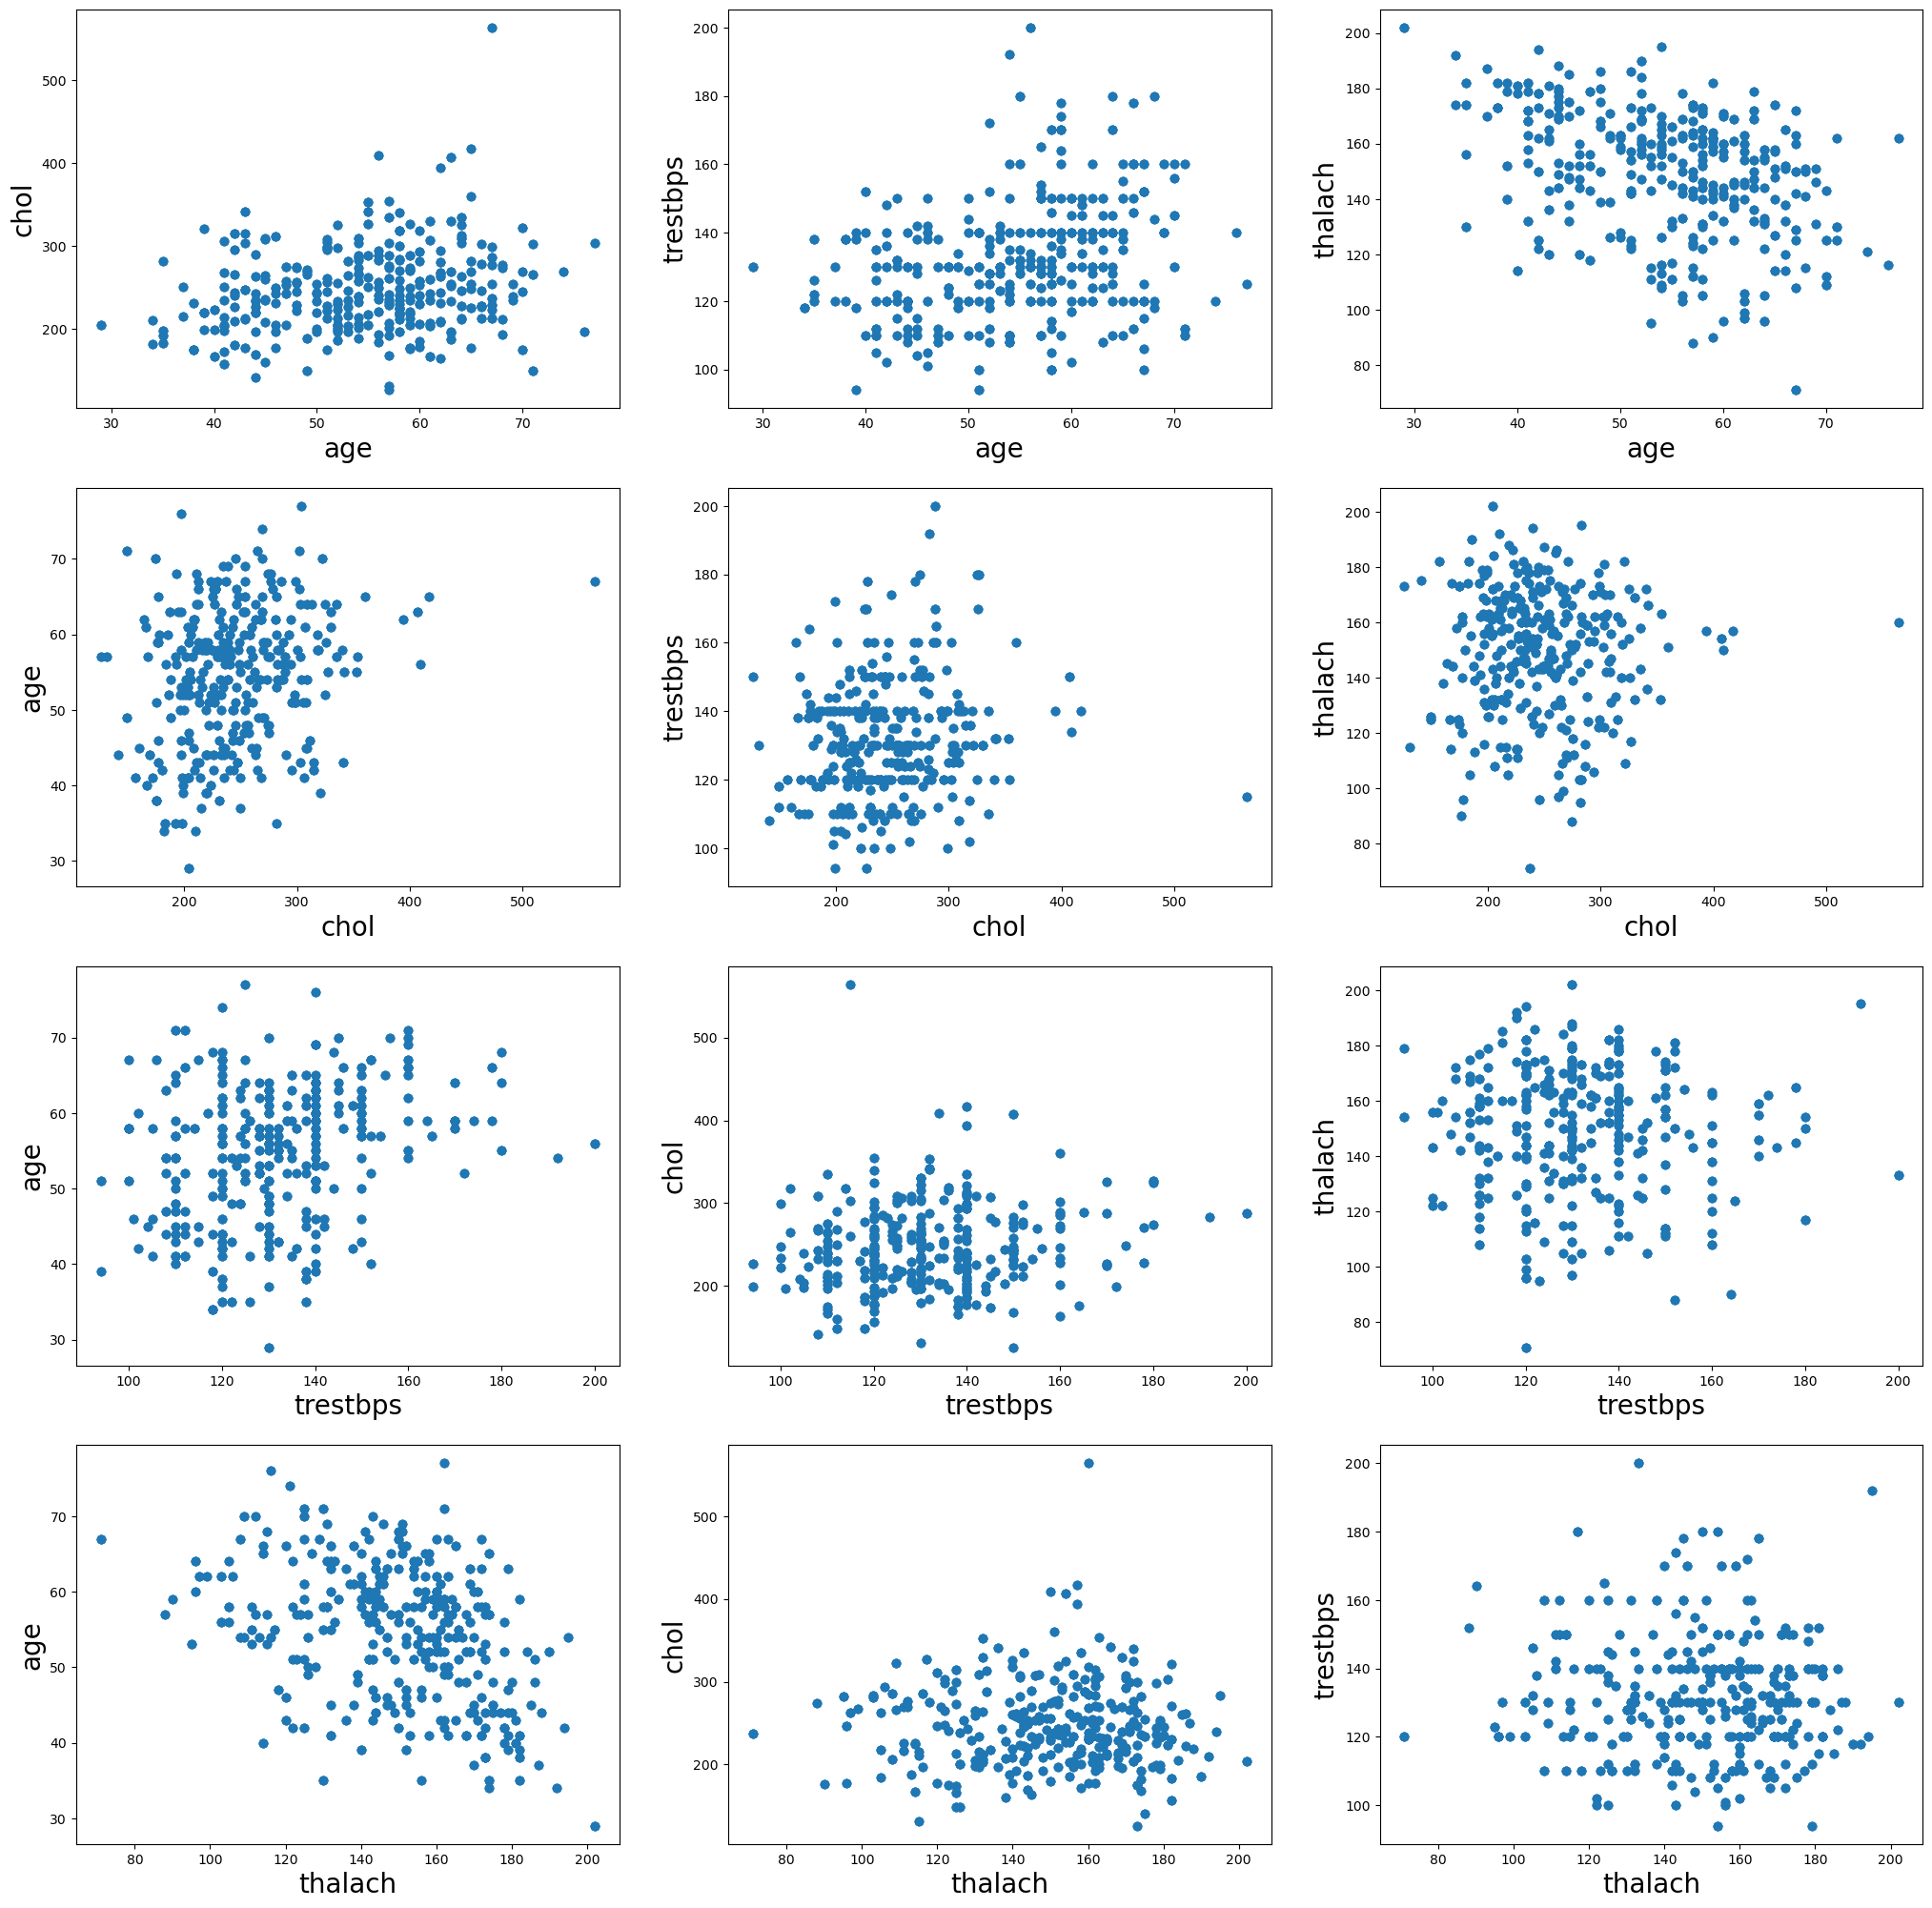

In [178]:
scatter(df, ["age","chol","trestbps","thalach"])

# 4.Teste de Correlação

In [20]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,1.21e-01,-0.13,-3.90e-01,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,2.72e-02,-0.06,-4.94e-02,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,7.93e-02,0.04,3.07e-01,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,1.82e-01,-0.12,-3.93e-02,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,2.69e-02,-0.15,-2.18e-02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00e+00,-0.10,-8.87e-03,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-1.04e-01,1.00,4.84e-02,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-8.87e-03,0.05,1.00e+00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,4.93e-02,-0.07,-3.80e-01,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,1.09e-02,-0.05,-3.50e-01,0.31,1.00,-0.58,0.22,0.20,-0.44


A **Matrix de correlações** indica relações significativas entre a covariancia linear de algumas das variaveis analisadas. Por exemplo, frequência cardiaca máxima observada(thalach) e idade(-.39) e outras moderadamente significativas entre idade e colesterol sérico(chol, .22) e idade e pressão arterial em repouso(trestbps, .27)

<AxesSubplot:>

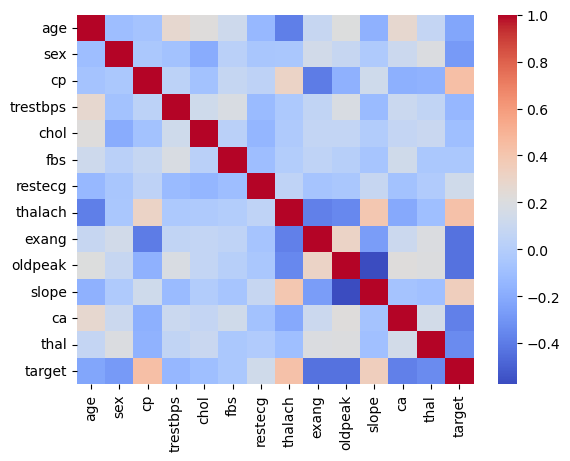

In [7]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")

# 5.MODELOS EXPLICATIVOS


#### Abaixo realizamos uma GRIDSEARCH procurando a melhor combinação de parametros para o nosso regressor logistico


In [227]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [222]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
scaler = StandardScaler()
log_reg = linear_model.LogisticRegression(random_state=42, solver="liblinear")
C = np.logspace(-4, 4, 50)
penalty = ["l1", "l2"]
cross_val_parameters = dict(log_reg__C=C, log_reg__penalty=penalty)
pipeline = Pipeline(steps=[("scaler", scaler), ("log_reg", log_reg)])

gridsearch = GridSearchCV(pipeline, cross_val_parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'log_reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9....
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'log_reg__penalty': ['l1', 'l2']})

In [328]:
print('Melhor Penalty:', gridsearch.best_estimator_.get_params()['log_reg__penalty'])
print('Melhor C:', gridsearch.best_estimator_.get_params()['log_reg__C'])
print(); print(gridsearch.best_estimator_.get_params()['log_reg'])

Melhor Penalty: l1
Melhor C: 0.8286427728546842

LogisticRegression(C=0.8286427728546842, penalty='l1', random_state=42,
                   solver='liblinear')


## 5.1 Modelo Selecionado
### Dada a gridsearch realizada, em busca dos melhores parametros, melhor modelo é o especificado acima

In [305]:
modelo = linear_model.LogisticRegression(C=0.8286427728546842, penalty='l1', random_state=42,solver='liblinear')

In [306]:
modelo.fit(X_train, y_train)

LogisticRegression(C=0.8286427728546842, penalty='l1', random_state=42,
                   solver='liblinear')

In [344]:
y_pred = modelo.predict(X_test)

In [345]:
from sklearn import metrics


In [346]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

## 5.2 Metricas do modelo

In [355]:
print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred):.2f} Total previsões corretas/Total previsões")
print(f"Precisão: {metrics.precision_score(y_test, y_pred):.2f} Positivos corretamente preditos/Total de positivos previstos")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f} Positivos corretamente previstos/Total de positivos reais")
print(f"Taxa de falso positivo: {(confusion_matrix[1][0]/sum(confusion_matrix[1])):.2f}")

Acurácia: 0.79 Total previsões corretas/Total previsões
Precisão: 0.74 Positivos corretamente preditos/Total de positivos previstos
Recall: 0.87 Positivos corretamente previstos/Total de positivos reais
Taxa de falso positivo: 0.13


Text(0.5, 23.52222222222222, 'valor previsto')

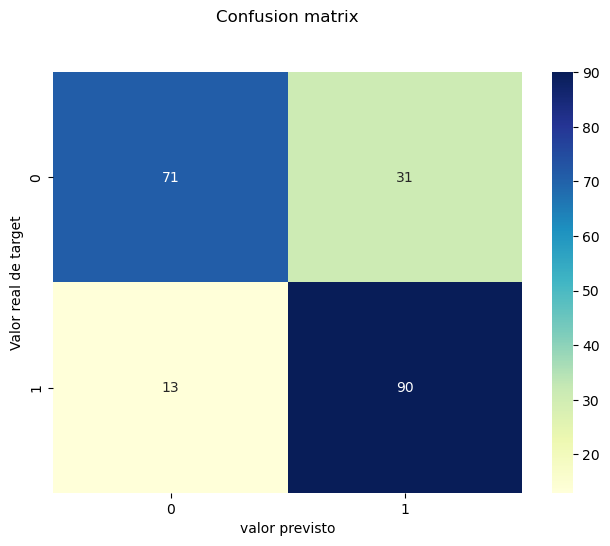

In [356]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel("Valor real de target")
plt.xlabel('valor previsto')

# 6. Interpretação dos Resultados

In [352]:
pd.DataFrame(np.exp(modelo.coef_[0]), df.columns[:-1], columns=["coef"])

,coef
age,1.014115
sex,0.192642
cp,2.296009
trestbps,0.984973
chol,0.991931
fbs,0.902889
restecg,1.331088
thalach,1.036545
exang,0.473119
oldpeak,0.530649


In [359]:
np.exp(modelo.intercept_[0])

2.759891032995668

### Acima apresentamos uma tabela com cada label usado na regressão e o coeficiente obtido no modelo final, passado por uma função exponencial de forma a facilitar a interpretação
#### "cp" ou tipo de dor no peito aparece como melhor preditor de problemas cardiácos, seguido de "slope" e de resultados do eletrocardiograma em repouso (restecg)


A interpretação matemática, em termos gerais, desses coeficientes exponenciados é a seguinte: dado o aumento da idade em 1 ano, todo o resto mantido constante, a *chance* do individuo apresentar doenças cardiacas é 1.4% maior.
Da mesma forma, o aumento da Frequência cardíaca máxima atingida (thalach) em 1 bpm, na interpretação do modelo, corresponderia, *ceteris paribus*, à uma chance 3% maior de problemas cardiacos.

Já um aumento em CHOL por exemplo, resultaria em uma redução em torno de 1%.